In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import statsmodels.api as sms
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
import sklearn.tree
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, auc,roc_auc_score, mean_squared_error
%matplotlib inline

In [ ]:
main_df = pd.read_csv(r"Marketing Campaign Data.csv")

In [ ]:
main_df1 = pd.read_excel(r"Marketing Campaign Data.xlsx")

In [ ]:
benchmark2 = pd.read_csv(r"marketing_campaign Data.csv")

In [ ]:
drop = ['Year_Birth', 'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2']
main_df.drop(drop, axis=1, inplace=True)

In [ ]:
main_df['Act_Resp']=main_df['Mnt_Response']
main_df['Act_Resp'].values[main_df['Act_Resp']>0]=1

In [ ]:
#binning consumers based on age
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
main_df['agerange'] = pd.cut(main_df.Age, bins, labels = labels, include_lowest = True)

# Visualization 

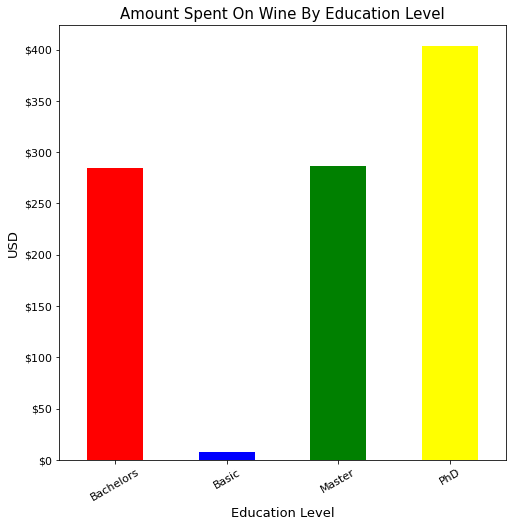

In [ ]:
Wine_Visual=main_df.groupby('Education').MntWines.mean().plot(kind='bar', color = ['red', 'blue','green', 'yellow'], figsize = (8,8))
plt.title('Amount Spent On Wine By Education Level',fontsize=15)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Education Level',fontsize=13)
plt.ylabel("USD", fontsize=13)
Wine_Visual.yaxis.set_major_formatter('${x:1.0f}')

Text(0, 0.5, 'Average Promotion Responses')

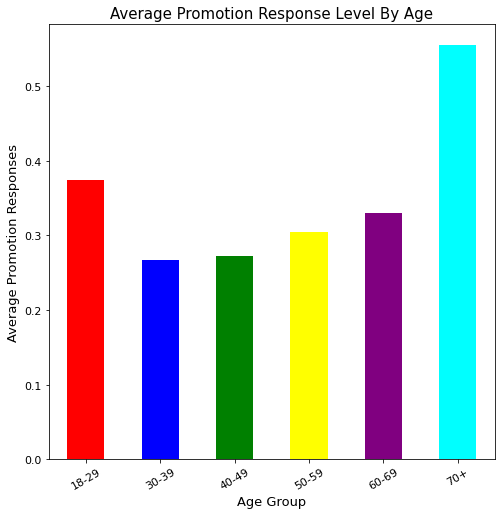

In [ ]:
Age_Promotion_Reponse=main_df.groupby('agerange').Mnt_Response.mean().plot(kind='bar', color = ['red', 'blue','green', 'yellow', 'Purple', 'Cyan'], figsize = (8,8))
plt.title('Average Promotion Response Level By Age',fontsize=15)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Age Group',fontsize=13)
plt.ylabel("Average Promotion Responses", fontsize=13)

Text(0, 0.5, 'Rate of Complaints')

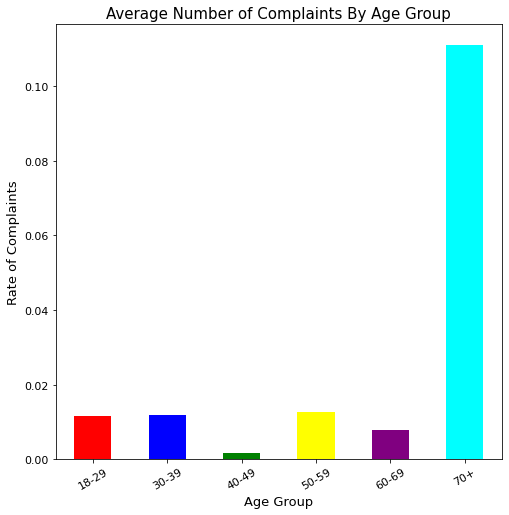

In [ ]:
Age_Promotion_Reponse=main_df.groupby('agerange').Complain.mean().plot(kind='bar', color = ['red', 'blue','green', 'yellow', 'Purple', 'Cyan'], figsize = (8,8))
plt.title('Average Number of Complaints By Age Group',fontsize=15)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Age Group',fontsize=13)
plt.ylabel("Rate of Complaints", fontsize=13)

In [ ]:
Avg_Web_Age=main_df.groupby('agerange').NumWebPurchases.mean()
Avg_Catalogue_Age=main_df.groupby('agerange').NumCatalogPurchases.mean()
Avg_Store_Age=main_df.groupby('agerange').NumStorePurchases.mean()
width = 0.25  # the width of the bars
x=np.arange(6)

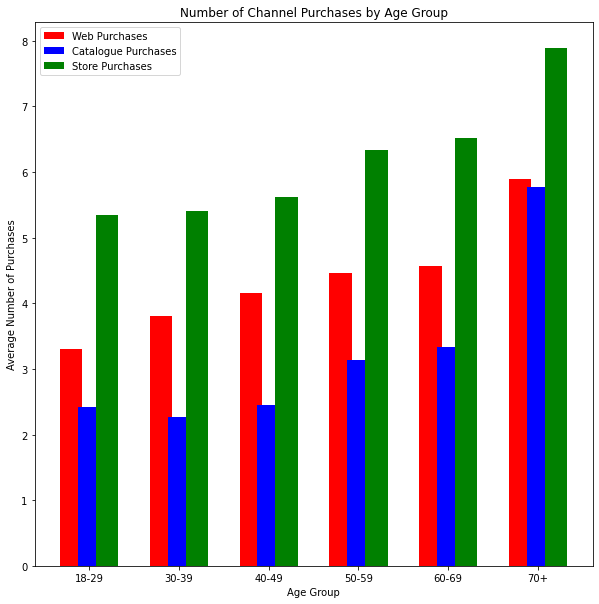

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(x-0.2,Avg_Web_Age , width, color='red')
plt.bar(x,Avg_Catalogue_Age, width, color='blue')
plt.bar(x+0.2,Avg_Store_Age, width, color='green')
plt.title('Number of Channel Purchases by Age Group')
plt.xticks(x, ['18-29', '30-39', '40-49', '50-59', '60-69', '70+'])
plt.xlabel("Age Group")
plt.ylabel("Average Number of Purchases")
plt.legend(["Web Purchases", "Catalogue Purchases", "Store Purchases"])
plt.show()

Text(0, 0.5, 'Average Website Visits ')

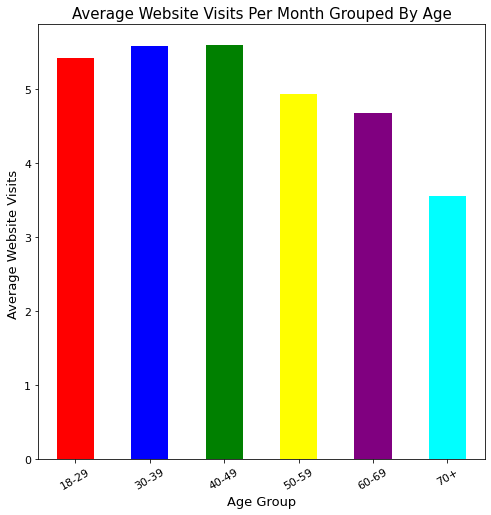

In [ ]:
Age_Promotion_Reponse=main_df.groupby('agerange').NumWebVisitsMonth.mean().plot(kind='bar', color = ['red', 'blue','green', 'yellow', 'Purple', 'Cyan'], figsize = (8,8))
plt.title('Average Website Visits Per Month Grouped By Age',fontsize=15)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Age Group',fontsize=13)
plt.ylabel("Average Website Visits ", fontsize=13)

In [ ]:
corr_df=main_df[['MntWines', 'Income', 'MntMeatProducts', 'NumCatalogPurchases', 'Recency', 'Age', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'NumDealsPurchases','Act_Resp']]

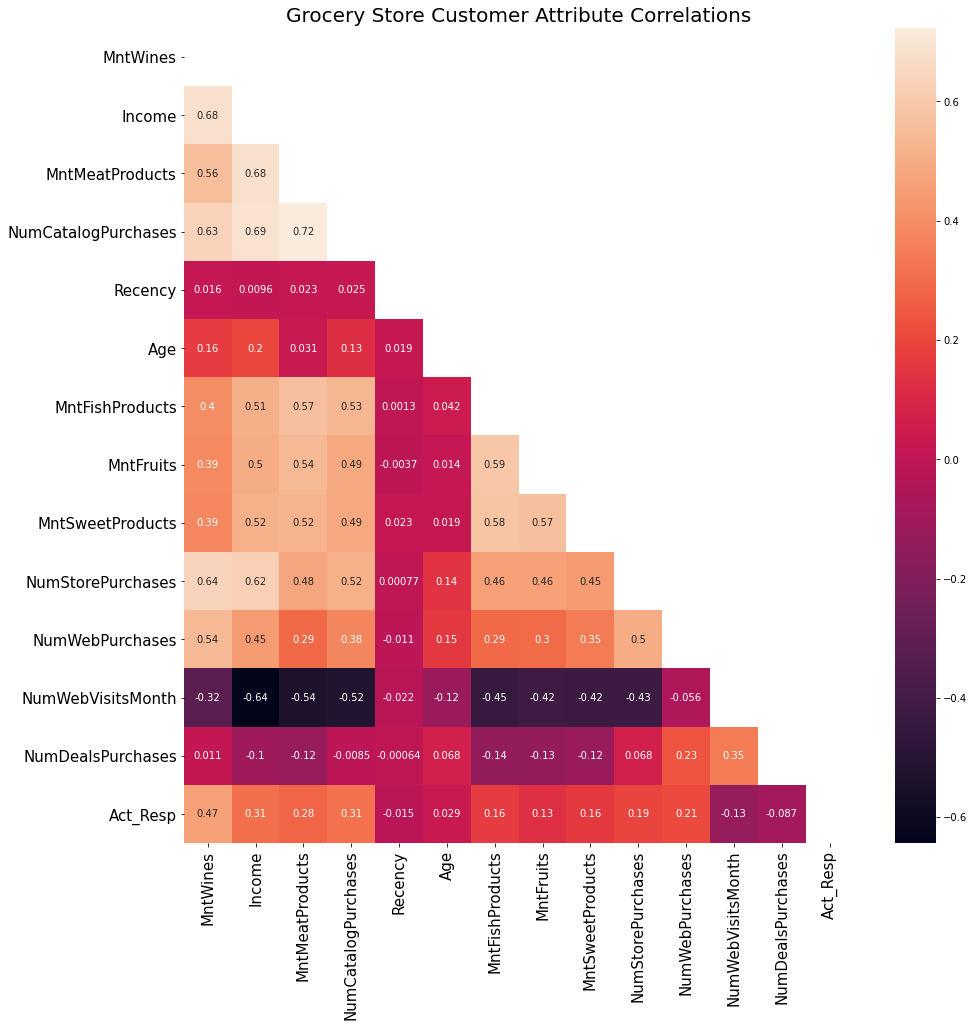

In [ ]:
pd.core.common.is_list_like = pd.api.types.is_list_like
corel=corr_df.corr()
mask=np.zeros_like(corel)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(15,15))
sns.heatmap(corel, annot=True, mask=mask)
plt.title('Grocery Store Customer Attribute Correlations', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# Preprocessing

In [ ]:
#Getting Dummies for Variables 
data = main_df.copy() 
data = pd.get_dummies(data)
data = data.iloc[:-1 , :]
data.drop('Mnt_Response', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      2235 non-null   int64
 1   Income                   2235 non-null   int64
 2   Kidhome                  2235 non-null   int64
 3   Teenhome                 2235 non-null   int64
 4   Recency                  2235 non-null   int64
 5   MntWines                 2235 non-null   int64
 6   MntFruits                2235 non-null   int64
 7   MntMeatProducts          2235 non-null   int64
 8   MntFishProducts          2235 non-null   int64
 9   MntSweetProducts         2235 non-null   int64
 10  NumDealsPurchases        2235 non-null   int64
 11  NumWebPurchases          2235 non-null   int64
 12  NumCatalogPurchases      2235 non-null   int64
 13  NumStorePurchases        2235 non-null   int64
 14  NumWebVisitsMonth        2235 non-null   int64
 15  Comp

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data[selected_feat], data["Act_Resp"], test_size=0.3, random_state=42)

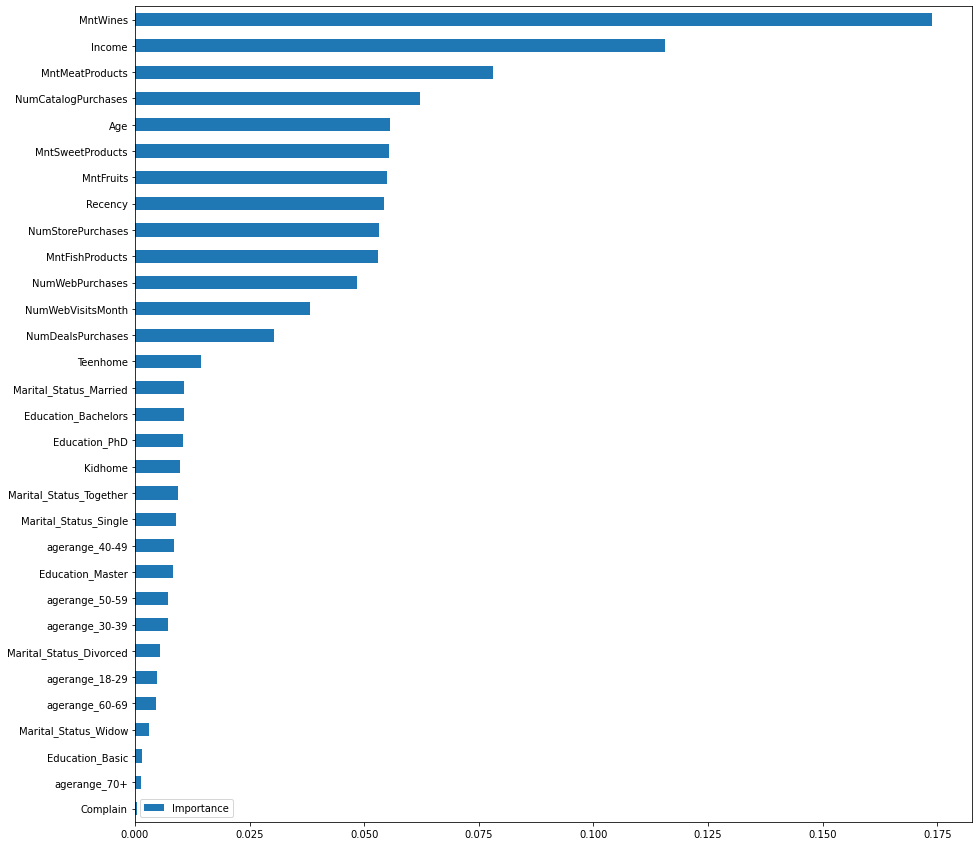

In [ ]:
#Feature Importance with Random Forest
clf = RandomForestClassifier()
clf.fit(data.drop('Act_Resp', axis=1), data['Act_Resp'])
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data.drop('Act_Resp', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(15,15));

In [ ]:
feature_nums = 26
ascend_import = importance.sort_values(by='Importance', ascending=False)
all_info = ascend_import['Importance'].iloc[:feature_nums].sum()
all_choosen_features = list(ascend_import.iloc[:feature_nums].index)

print('Names: ', all_choosen_features)
print('Importance Ratio: ', all_info)

Names:  ['MntWines', 'Income', 'MntMeatProducts', 'NumCatalogPurchases', 'Age', 'MntSweetProducts', 'MntFruits', 'Recency', 'NumStorePurchases', 'MntFishProducts', 'NumWebPurchases', 'NumWebVisitsMonth', 'NumDealsPurchases', 'Teenhome', 'Marital_Status_Married', 'Education_Bachelors', 'Education_PhD', 'Kidhome', 'Marital_Status_Together', 'Marital_Status_Single', 'agerange_40-49', 'Education_Master', 'agerange_50-59', 'agerange_30-39', 'Marital_Status_Divorced', 'agerange_18-29']
Importance Ratio:  0.9891302264087037


#### Train test for minimum features 

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data[selected_feat], data["Act_Resp"], test_size=0.3, random_state=42)

#### Train Test Split for maximum features 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data[all_choosen_features], data["Act_Resp"], test_size=0.3, random_state=42)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)
sel.get_support()
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

12

In [ ]:
print(selected_feat)

Index(['MntWines', 'Income', 'MntMeatProducts', 'NumCatalogPurchases', 'Age',
       'MntSweetProducts', 'MntFruits', 'Recency', 'NumStorePurchases',
       'MntFishProducts', 'NumWebPurchases', 'NumWebVisitsMonth'],
      dtype='object')


In [ ]:
benchmark3=benchmark2.dropna()

In [ ]:
benchmark_p=benchmark3.copy()

# Models

# Random Forest Classifier

### Benchmark preprocessing

In [ ]:
drop2 = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

In [ ]:
benchmark_p=benchmark_p.drop(columns = drop2)

In [ ]:
clf1 = RandomForestClassifier()
clf1.fit(benchmark_p.drop('tot_Acc', axis=1), benchmark_p['tot_Acc'])

RandomForestClassifier()

In [ ]:
#attribute selection for model that doesn't use campaigns
benchmark_attributes=benchmark_p.loc[:, benchmark_p.columns != "tot_Acc"]

In [ ]:
#Benchmark Train Test Split 
x_train2, x_test2, y_train2, y_test2 = train_test_split(benchmark_attributes, benchmark_p["tot_Acc"], test_size=0.3, random_state=42)

#### For offical benchmark test

In [ ]:
clf2 = RandomForestClassifier()
X1=benchmark3[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']]
Y2=benchmark3[['tot_Acc']]
x_train6, x_test6, y_train6, y_test6 = train_test_split(X1,Y2, test_size=0.3, random_state=42)

### Benchmark Test (with all features INCLUDING campaign results)
official benchmark test (without certain features)

In [ ]:
RFCb1 = RandomForestClassifier(n_estimators=175,random_state=2)
RFCb1.fit(x_train6,y_train6.values.ravel())
print("The accuracy score is ", accuracy_score(y_test6, RFCb1.predict(x_test6)))
#print("The area under ROC is ", roc_auc_RFCb1)
print(confusion_matrix(y_test6, RFCb1.predict(x_test6)))
print(classification_report(y_test6, RFCb1.predict(x_test6)))
RFC_crossvalb1 = cross_val_score(RFCb1,x_train6,y_train6.values.ravel(),cv=10)
print(RFC_crossvalb1.mean())

The accuracy score is  0.9984962406015038
[[521   0]
 [  1 143]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       521
           1       1.00      0.99      1.00       144

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

1.0


In [ ]:
probs_RFCb1 = RFCb1.predict_proba(x_test6)
preds_RFCb1 = probs_RFCb1[:,1]
fpr_RFCb1, tpr_RFCb1, threshold_RFCb1 = roc_curve(y_test6, RFCb1.predict(x_test6))
roc_auc_RFCb1 = auc(fpr_RFCb1, tpr_RFCb1)
print("The area under ROC is ", roc_auc_RFCb1)

The area under ROC is  0.9965277777777778


### Benchmark Test (with all features NOT campaign results)

In [ ]:
RFCb = RandomForestClassifier(n_estimators=175,random_state=2)
RFCb.fit(x_train2,y_train2)
print("The accuracy score is ", accuracy_score(y_test2, RFCb.predict(x_test2)))
#print("The area under ROC is ", roc_auc_RFCb)
print(confusion_matrix(y_test2, RFCb.predict(x_test2)))
print(classification_report(y_test2, RFCb.predict(x_test2)))
RFC_crossvalb = cross_val_score(RFCb,x_train2,y_train2,cv=10)
print(RFC_crossvalb)
print(RFC_crossvalb.mean())

The accuracy score is  0.8541353383458646
[[501  20]
 [ 77  67]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       521
           1       0.77      0.47      0.58       144

    accuracy                           0.85       665
   macro avg       0.82      0.71      0.75       665
weighted avg       0.85      0.85      0.84       665

[0.85897436 0.87741935 0.83225806 0.89032258 0.87741935 0.82580645
 0.88387097 0.85806452 0.85806452 0.83225806]
0.8594458229942102


In [ ]:
probs_RFCb = RFCb.predict_proba(x_test2)
preds_RFCb = probs_RFCb[:,1]
fpr_RFCb, tpr_RFCb, threshold_RFCb = roc_curve(y_test2, RFCb.predict(x_test2))
roc_auc_RFCb = auc(fpr_RFCb, tpr_RFCb)
print("The area under ROC is ", roc_auc_RFCb)

The area under ROC is  0.7134450309234378


### RFC model for maximum features and no SMOTE

In [ ]:
RFC1 = RandomForestClassifier(n_estimators=175,random_state=2)
RFC1.fit(x_train,y_train)
print("The accuracy score is ", accuracy_score(y_test, RFC1.predict(x_test)))
print(confusion_matrix(y_test, RFC1.predict(x_test)))
print(classification_report(y_test, RFC1.predict(x_test)))
RFC_crossval1 = cross_val_score(RFC1,x_train,y_train,cv=10)
print(RFC_crossval1)
print(RFC_crossval1.mean())

The accuracy score is  0.8688524590163934
[[518  15]
 [ 73  65]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       533
           1       0.81      0.47      0.60       138

    accuracy                           0.87       671
   macro avg       0.84      0.72      0.76       671
weighted avg       0.86      0.87      0.85       671

[0.88535032 0.84713376 0.81528662 0.84713376 0.81410256 0.87179487
 0.85897436 0.8525641  0.82692308 0.86538462]
0.8484648048342315


In [ ]:
probs_RFC1 = RFC1.predict_proba(x_test)
preds_RFC1 = probs_RFC1[:,1]
fpr_RFC1, tpr_RFC1, threshold_RFC1 = roc_curve(y_test, RFC1.predict(x_test))
roc_auc_RFC1 = auc(fpr_RFC1, tpr_RFC1)
print("The area under ROC is ", roc_auc_RFC1)

The area under ROC is  0.7214359518177121


### RFC with Maximum features and SMOTE

In [ ]:
#x_train4, y_train4 Mf and SMOTE
sm = SMOTE(random_state=2)
x_train4, y_train4 = sm.fit_resample(x_train, y_train.ravel())

In [ ]:
RFC2 = RandomForestClassifier(n_estimators=175,random_state=2)
RFC2.fit(x_train4,y_train4)
print("The accuracy score is ", accuracy_score(y_test, RFC2.predict(x_test)))
print(confusion_matrix(y_test, RFC2.predict(x_test)))
print(classification_report(y_test, RFC2.predict(x_test)))
RFC_crossval2 = cross_val_score(RFC2,x_train,y_train,cv=10)
print(RFC_crossval2)
print(RFC_crossval2.mean())

The accuracy score is  0.8628912071535022
[[498  35]
 [ 57  81]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       533
           1       0.70      0.59      0.64       138

    accuracy                           0.86       671
   macro avg       0.80      0.76      0.78       671
weighted avg       0.86      0.86      0.86       671

[0.76612903 0.79032258 0.87903226 0.93145161 0.93145161 0.91532258
 0.96370968 0.95564516 0.94758065 0.93951613]
0.902016129032258


In [ ]:
probs_RFC2 = RFC2.predict_proba(x_test)
preds_RFC2 = probs_RFC2[:,1]
fpr_RFC2, tpr_RFC2, threshold_RFC2 = roc_curve(y_test, RFC2.predict(x_test))
roc_auc_RFC2 = auc(fpr_RFC2, tpr_RFC2)
print("The area under ROC is ", roc_auc_RFC2)

The area under ROC is  0.7606452402316666


### RFC model for minimum features and no SMOTE

In [ ]:
RFC3 = RandomForestClassifier(n_estimators=175,random_state=2)
RFC3.fit(x_train1,y_train1)
print("The accuracy score is ", accuracy_score(y_test1, RFC3.predict(x_test1)))
print(confusion_matrix(y_test1, RFC3.predict(x_test1)))
print(classification_report(y_test1, RFC3.predict(x_test1)))
RFC_crossval3 = cross_val_score(RFC3,x_train1,y_train1,cv=10)
print(RFC_crossval3)
print(RFC_crossval3.mean())

The accuracy score is  0.8688524590163934
[[513  20]
 [ 68  70]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       533
           1       0.78      0.51      0.61       138

    accuracy                           0.87       671
   macro avg       0.83      0.73      0.77       671
weighted avg       0.86      0.87      0.86       671

[0.89171975 0.84713376 0.80254777 0.85350318 0.81410256 0.84615385
 0.8525641  0.83974359 0.8525641  0.8525641 ]
0.8452596766291034


In [ ]:
probs_RFC3 = RFC3.predict_proba(x_test1)
preds_RFC3 = probs_RFC3[:,1]
fpr_RFC3, tpr_RFC3, threshold_RFC3 = roc_curve(y_test1, RFC3.predict(x_test1))
roc_auc_RFC3 = auc(fpr_RFC3, tpr_RFC3)
print("The area under ROC is ", roc_auc_RFC3)

The area under ROC is  0.7640441036517389


### RFC model for minimum features and SMOTE

In [ ]:
#x_trains, y_trains min fea and SMOTE
sm = SMOTE(random_state=2)
x_trains, y_trains = sm.fit_resample(x_train1, y_train1.ravel())

In [ ]:
RFC4 = RandomForestClassifier(n_estimators=175,random_state=2)
RFC4.fit(x_trains,y_trains)
print("The accuracy score is ", accuracy_score(y_test1, RFC4.predict(x_test1)))
print(confusion_matrix(y_test1, RFC4.predict(x_test1)))
print(classification_report(y_test1, RFC4.predict(x_test1)))
RFC_crossval4 = cross_val_score(RFC4,x_trains,y_trains,cv=10)
print(RFC_crossval4)
print(RFC_crossval4.mean())

The accuracy score is  0.8256333830104322
[[463  70]
 [ 47  91]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       533
           1       0.57      0.66      0.61       138

    accuracy                           0.83       671
   macro avg       0.74      0.76      0.75       671
weighted avg       0.84      0.83      0.83       671

[0.85887097 0.86290323 0.86693548 0.91532258 0.89112903 0.88306452
 0.94354839 0.93548387 0.91935484 0.89919355]
0.8975806451612902


In [ ]:
probs_RFC4 = RFC4.predict_proba(x_test1)
preds_RFC4 = probs_RFC4[:,1]
fpr_RFC4, tpr_RFC4, threshold_RFC4 = roc_curve(y_test1, RFC4.predict(x_test1))
roc_auc_RFC4 = auc(fpr_RFC4, tpr_RFC4)
print("The area under ROC is ", roc_auc_RFC4)

The area under ROC is  0.7640441036517389


## Receiver Operating Characteristic

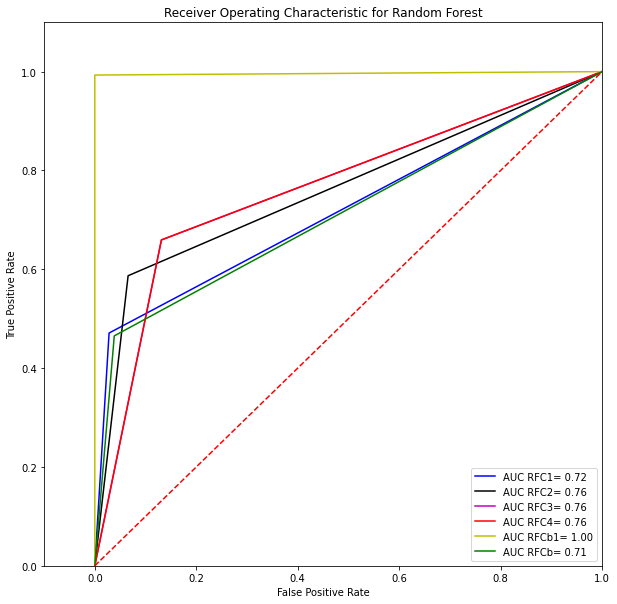

In [ ]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr_RFC1, tpr_RFC1, 'b', label = 'AUC RFC1= %0.2f' % roc_auc_RFC1)
plt.plot(fpr_RFC2, tpr_RFC2, 'k', label = 'AUC RFC2= %0.2f' % roc_auc_RFC2)
plt.plot(fpr_RFC3, tpr_RFC3, 'm', label = 'AUC RFC3= %0.2f' % roc_auc_RFC3)
plt.plot(fpr_RFC4, tpr_RFC4, 'r', label = 'AUC RFC4= %0.2f' % roc_auc_RFC4)
plt.plot(fpr_RFCb1, tpr_RFCb1, 'y', label = 'AUC RFCb1= %0.2f' % roc_auc_RFCb1)
plt.plot(fpr_RFCb, tpr_RFCb, 'g', label = 'AUC RFCb= %0.2f' % roc_auc_RFCb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree Classifier

### Benchmark Test (with all features INCLUDING campaign results)
official benchmark test (without certain features)

In [ ]:
DTC = sklearn.tree.DecisionTreeClassifier()
DTC.fit(x_train6, y_train6)
print("The accuracy is ", accuracy_score(y_test6, DTC.predict(x_test6)))
print(confusion_matrix(y_test6, DTC.predict(x_test6)))
print(classification_report(y_test6, DTC.predict(x_test6)))

The accuracy is  0.9984962406015038
[[521   0]
 [  1 143]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       521
           1       1.00      0.99      1.00       144

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665



In [ ]:
probs_DTC = DTC.predict_proba(x_test6)
preds_DTC = probs_DTC[:,1]
fpr_DTC, tpr_DTC, threshold_DTC = roc_curve(y_test6, DTC.predict(x_test6))
roc_auc_DTC = auc(fpr_DTC, tpr_DTC)
print("The area under ROC is ", roc_auc_DTC)

The area under ROC is  0.9965277777777778


### Benchmark Test (with all features NOT campaign results)

In [ ]:
DTCb = sklearn.tree.DecisionTreeClassifier()
DTCb.fit(x_train2, y_train2)
print("The accuracy score is ", accuracy_score(y_test2, DTCb.predict(x_test2)))
print(confusion_matrix(y_test2, DTCb.predict(x_test2)))
print(classification_report(y_test2, DTCb.predict(x_test2)))

The accuracy score is  0.7954887218045112
[[453  68]
 [ 68  76]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       521
           1       0.53      0.53      0.53       144

    accuracy                           0.80       665
   macro avg       0.70      0.70      0.70       665
weighted avg       0.80      0.80      0.80       665



In [ ]:
probs_DTCb = DTCb.predict_proba(x_test2)
preds_DTCb = probs_DTCb[:,1]
fpr_DTCb, tpr_DTCb, threshold_DTCb = roc_curve(y_test2, DTCb.predict(x_test2))
roc_auc_DTCb = auc(fpr_DTCb, tpr_DTCb)
print("The area under ROC is ", roc_auc_DTCb)

The area under ROC is  0.6986297718063553


### DTC model for maximum features and no SMOTE

In [ ]:
DTC1 = sklearn.tree.DecisionTreeClassifier()
DTC1.fit(x_train, y_train)
print("The accuracy score is ", accuracy_score(y_test, DTC1.predict(x_test)))
print(confusion_matrix(y_test, DTC1.predict(x_test)))
print(classification_report(y_test, DTC1.predict(x_test)))

The accuracy score is  0.8077496274217586
[[463  70]
 [ 59  79]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       533
           1       0.53      0.57      0.55       138

    accuracy                           0.81       671
   macro avg       0.71      0.72      0.71       671
weighted avg       0.81      0.81      0.81       671



In [ ]:
probs_DTC1 = DTC1.predict_proba(x_test)
preds_DTC1 = probs_DTC1[:,1]
fpr_DTC1, tpr_DTC1, threshold_DTC1 = roc_curve(y_test, DTC1.predict(x_test))
roc_auc_DTC1 = auc(fpr_DTC1, tpr_DTC1)
print("The area under ROC is ", roc_auc_DTC1)

The area under ROC is  0.7205658427821735


### DTC with Maximum features and SMOTE

In [ ]:
DTC2 = sklearn.tree.DecisionTreeClassifier()
DTC2.fit(x_train4, y_train4)
print("The accuracy score is ", accuracy_score(y_test, DTC2.predict(x_test)))
print(confusion_matrix(y_test, DTC2.predict(x_test)))
print(classification_report(y_test, DTC2.predict(x_test)))

The accuracy score is  0.8047690014903129
[[464  69]
 [ 62  76]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       533
           1       0.52      0.55      0.54       138

    accuracy                           0.80       671
   macro avg       0.70      0.71      0.71       671
weighted avg       0.81      0.80      0.81       671



In [ ]:
probs_DTC2 = DTC2.predict_proba(x_test)
preds_DTC2 = probs_DTC2[:,1]
fpr_DTC2, tpr_DTC2, threshold_DTC2 = roc_curve(y_test, DTC2.predict(x_test))
roc_auc_DTC2 = auc(fpr_DTC2, tpr_DTC2)
print("The area under ROC is ", roc_auc_DTC2)

The area under ROC is  0.7106343638687224


### DTC model for minimum features and no SMOTE

In [ ]:
DTC3 = sklearn.tree.DecisionTreeClassifier()
DTC3.fit(x_train1, y_train1)
print("The accuracy score is ", accuracy_score(y_test1, DTC3.predict(x_test1)))
print(confusion_matrix(y_test1, DTC3.predict(x_test1)))
print(classification_report(y_test1, DTC3.predict(x_test1)))

The accuracy score is  0.8107302533532041
[[466  67]
 [ 60  78]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       533
           1       0.54      0.57      0.55       138

    accuracy                           0.81       671
   macro avg       0.71      0.72      0.72       671
weighted avg       0.81      0.81      0.81       671



In [ ]:
probs_DTC3 = DTC3.predict_proba(x_test1)
preds_DTC3 = probs_DTC3[:,1]
fpr_DTC3, tpr_DTC3, threshold_DTC3 = roc_curve(y_test1, DTC3.predict(x_test1))
roc_auc_DTC3 = auc(fpr_DTC3, tpr_DTC3)
print("The area under ROC is ", roc_auc_DTC3)

The area under ROC is  0.7197569132881964


### DTC model for minimum features and SMOTE

In [ ]:
DTC4 = sklearn.tree.DecisionTreeClassifier()
DTC4.fit(x_trains, y_trains)
print("The accuracy score is ", accuracy_score(y_test1, DTC4.predict(x_test1)))
print(confusion_matrix(y_test1, DTC4.predict(x_test1)))
print(classification_report(y_test1, DTC4.predict(x_test1)))

The accuracy score is  0.7690014903129657
[[433 100]
 [ 55  83]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       533
           1       0.45      0.60      0.52       138

    accuracy                           0.77       671
   macro avg       0.67      0.71      0.68       671
weighted avg       0.80      0.77      0.78       671



In [ ]:
probs_DTC4 = DTC3.predict_proba(x_test1)
preds_DTC4 = probs_DTC3[:,1]
fpr_DTC4, tpr_DTC4, threshold_DTC4 = roc_curve(y_test1, DTC4.predict(x_test1))
roc_auc_DTC4 = auc(fpr_DTC4, tpr_DTC4)
print("The area under ROC is ", roc_auc_DTC4)

The area under ROC is  0.7069160072871632


## Receiver Operating Characteristic

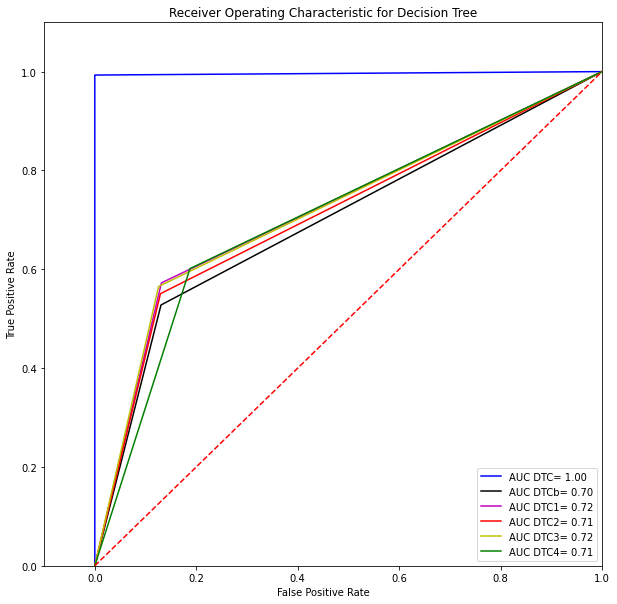

In [ ]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr_DTC, tpr_DTC, 'b', label = 'AUC DTC= %0.2f' % roc_auc_DTC)
plt.plot(fpr_DTCb, tpr_DTCb, 'k', label = 'AUC DTCb= %0.2f' % roc_auc_DTCb)
plt.plot(fpr_DTC1, tpr_DTC1, 'm', label = 'AUC DTC1= %0.2f' % roc_auc_DTC1)
plt.plot(fpr_DTC2, tpr_DTC2, 'r', label = 'AUC DTC2= %0.2f' % roc_auc_DTC2)
plt.plot(fpr_DTC3, tpr_DTC3, 'y', label = 'AUC DTC3= %0.2f' % roc_auc_DTC3)
plt.plot(fpr_DTC4, tpr_DTC4, 'g', label = 'AUC DTC4= %0.2f' % roc_auc_DTC4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Data Preprocessing for Logistic Regression

In [ ]:
dropCol = ["Year_Birth","Dt_Customer","AcceptedCmp3","AcceptedCmp2","AcceptedCmp5","AcceptedCmp4","AcceptedCmp1","Response","Mnt_Response"]
main_df1.drop(columns=dropCol, inplace=True)

In [ ]:
main_df1.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MRKTG_RESPONSE
0,57,Bachelors,Single,58138,0,0,58,635,88,546,172,88,3,8,10,4,7,0,0
1,60,Bachelors,Single,46344,1,1,38,11,1,6,2,1,2,1,1,2,5,0,0
2,49,Bachelors,Together,71613,0,0,26,426,49,127,111,21,1,8,2,10,4,0,0
3,30,Bachelors,Together,26646,1,0,26,11,4,20,10,3,2,2,0,4,6,0,0
4,33,PhD,Married,58293,1,0,94,173,43,118,46,27,5,5,3,6,5,0,0


In [ ]:
data1 = main_df1.copy() 
data1 = pd.get_dummies(data1)
data1 = data1.iloc[:-1 , :]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      2235 non-null   int64
 1   Income                   2235 non-null   int64
 2   Kidhome                  2235 non-null   int64
 3   Teenhome                 2235 non-null   int64
 4   Recency                  2235 non-null   int64
 5   MntWines                 2235 non-null   int64
 6   MntFruits                2235 non-null   int64
 7   MntMeatProducts          2235 non-null   int64
 8   MntFishProducts          2235 non-null   int64
 9   MntSweetProducts         2235 non-null   int64
 10  NumDealsPurchases        2235 non-null   int64
 11  NumWebPurchases          2235 non-null   int64
 12  NumCatalogPurchases      2235 non-null   int64
 13  NumStorePurchases        2235 non-null   int64
 14  NumWebVisitsMonth        2235 non-null   int64
 15  Comp

#### Normalize the attributes

In [ ]:
data2 = data1.copy()
for i in data2.columns:
  data2[i] = (data2[i] - min(data2[i]))/ (max(data2[i]) - min(data2[i]))

#### Feature Importance with LR - finding coefficient VALUES

Feature: 0, Score: -0.14859
Feature: 1, Score: 1.75992
Feature: 2, Score: -0.14371
Feature: 3, Score: -0.85707
Feature: 4, Score: -0.22769
Feature: 5, Score: 4.67005
Feature: 6, Score: -0.88766
Feature: 7, Score: 0.22968
Feature: 8, Score: -0.24256
Feature: 9, Score: -0.11861
Feature: 10, Score: -1.08105
Feature: 11, Score: 0.66965
Feature: 12, Score: 1.44026
Feature: 13, Score: -1.12341
Feature: 14, Score: 0.97454
Feature: 15, Score: -0.25332
Feature: 16, Score: 0.07022
Feature: 17, Score: 0.26120
Feature: 18, Score: -0.03292
Feature: 19, Score: -0.29949
Feature: 20, Score: -0.12199
Feature: 21, Score: 0.05114
Feature: 22, Score: -0.04683
Feature: 23, Score: -0.07330
Feature: 24, Score: 0.18999


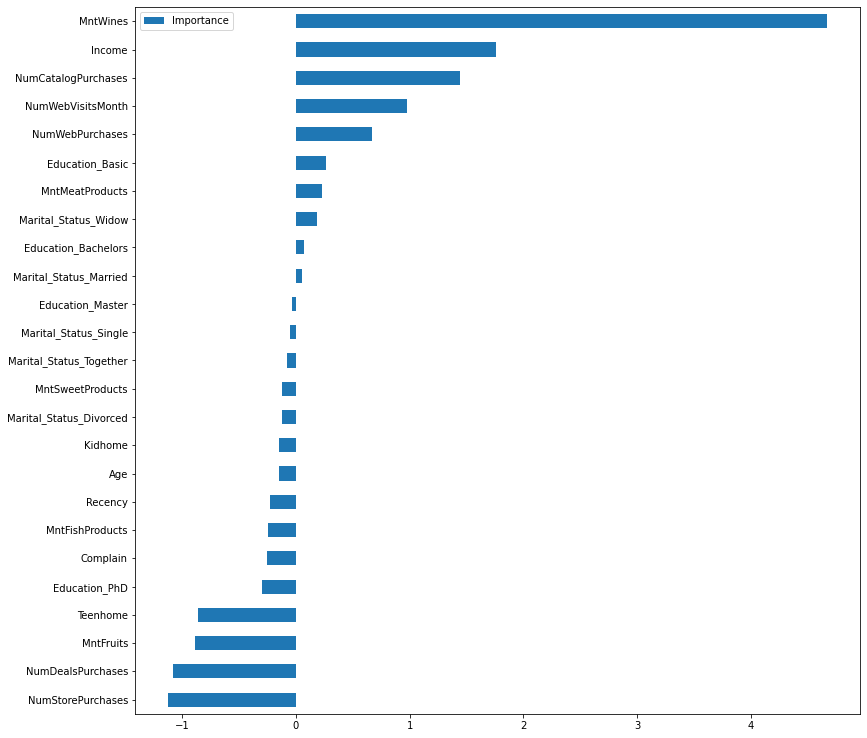

In [ ]:
clflg = LogisticRegression(solver='lbfgs', max_iter=1000)
clflg.fit(data2.drop('MRKTG_RESPONSE', axis=1), data2['MRKTG_RESPONSE'])
importance = (clflg.coef_[0])
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

importance = pd.DataFrame(importance, index=data2.drop('MRKTG_RESPONSE', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(13,13));

In [ ]:
#Train Test Split for All features
x_trainlg, x_testlg, y_trainlg, y_testlg = train_test_split(data2.drop('MRKTG_RESPONSE', axis=1), data2['MRKTG_RESPONSE'], test_size=0.3, random_state=42)

### Logistic Regression for All features
#WITHOUT SMOTE

In [1]:
log = LogisticRegression(solver='lbfgs', max_iter=1000)
log.fit(x_trainlg,y_trainlg)
pred_lg = log.predict(x_testlg)
print(confusion_matrix(y_testlg, pred_lg))
print(classification_report(y_testlg, log.predict(x_testlg)))
cross_val_score_log = sklearn.model_selection.cross_val_score(log, x_trainlg, y_trainlg, cv=10)
print(cross_val_score_log.mean())

NameError: ignored

In [ ]:
#ROC FOR LOGISTIC REGRESSION WITH ALL FEATURES
probs_LR1 = log.predict_proba(x_testlg)
preds_LR1 = probs_LR1[:,1]
fpr_LR1, tpr_LR1, threshold_LR1 = roc_curve(y_testlg, log.predict(x_testlg))
roc_auc_LR1 = auc(fpr_LR1, tpr_LR1)

In [ ]:
data1.head()

In [ ]:
# Standardize the train and test sample
scaler = StandardScaler()
x=data1.drop('MRKTG_RESPONSE', axis=1)
X_std = scaler.fit_transform(x) 
X_train_std, x_testlg1, y_trainlg1, y_testlg1 = train_test_split(X_std, data1["MRKTG_RESPONSE"], test_size=0.3, random_state=42)

param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}
lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_train_std, y_trainlg1)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_train_std, y_trainlg)
coef = model.coef_[0]
print("coeff",coef)
X_std1 = pd.DataFrame(X_std, index=x.index, columns=x.columns)
imp_features = pd.Series(X_std1.columns)[list(coef!=0)]
print(imp_features)

### LOGISTIC REGRESSION WITH IMPORTANT FEATURES
Without SMOTE

In [ ]:
#TRAIN TEST SPLIT FOR IMPORTANT FEATURES
x_trainImp, x_testImp, y_trainImp, y_testImp = train_test_split(data1[imp_features], data1["MRKTG_RESPONSE"], test_size=0.3, random_state=42)

In [ ]:
log2 = LogisticRegression(solver='lbfgs', max_iter=10000)
log2.fit(x_trainImp,y_trainImp)
pred_lg2 = log2.predict(x_testImp)
print(confusion_matrix(y_testImp, pred_lg2))
print(classification_report(y_testImp, log2.predict(x_testImp)))
cross_val_score_log2 = sklearn.model_selection.cross_val_score(log2, x_trainImp, y_trainImp, cv=10)
print(cross_val_score_log2.mean())

[[503  30]
 [ 87  51]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       533
           1       0.63      0.37      0.47       138

    accuracy                           0.83       671
   macro avg       0.74      0.66      0.68       671
weighted avg       0.81      0.83      0.81       671

0.822885023681202


In [ ]:
#ROC FOR LOGISTIC REGRESSION WITH IMPORTANT FEATURES, WITHOUT SMOTE
probs_LR2 = log2.predict_proba(x_testImp)
preds_LR2 = probs_LR2[:,1]
fpr_LR2, tpr_LR2, threshold_LR2 = roc_curve(y_testImp, log2.predict(x_testImp))
roc_auc_LR2 = auc(fpr_LR2, tpr_LR2)

## Receiver Operating Characteristic

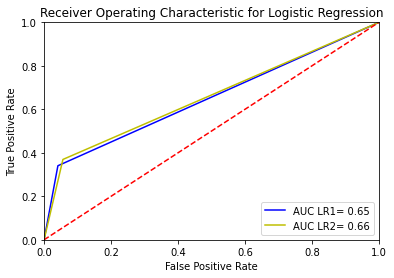

In [ ]:
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr_LR1, tpr_LR1, 'b', label = 'AUC LR1= %0.2f' % roc_auc_LR1)
plt.plot(fpr_LR2, tpr_LR2, 'y', label = 'AUC LR2= %0.2f' % roc_auc_LR2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LOGISTIC REGRESSION WITH ALL FEATURES
WITH SMOTE 

In [ ]:
smote = SMOTE(random_state = 2)
x_train3, ytrain3 = smote.fit_resample(x_trainlg, y_trainlg)
xtrain3 = pd.DataFrame(x_train3, columns=x_trainlg.columns)
log3 = LogisticRegression(solver='lbfgs', max_iter=1000)
log3.fit(xtrain3,ytrain3)
pred_lg3 = log3.predict(x_testlg)
print(confusion_matrix(y_testlg, pred_lg3))
print(classification_report(y_testlg, log3.predict(x_testlg)))
cross_val_score_log3 = sklearn.model_selection.cross_val_score(log3, xtrain3, ytrain3, cv=10)
print(cross_val_score_log3.mean())

[[442  91]
 [ 42  96]]
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       533
         1.0       0.51      0.70      0.59       138

    accuracy                           0.80       671
   macro avg       0.71      0.76      0.73       671
weighted avg       0.83      0.80      0.81       671

0.7451612903225807


In [ ]:
probs_LR3 = log3.predict_proba(x_testlg)
preds_LR3 = probs_LR3[:,1]
fpr_LR3, tpr_LR3, threshold_LR3 = roc_curve(y_testlg, log3.predict(x_testlg))
roc_auc_LR3 = auc(fpr_LR3, tpr_LR3)

### LOGISTIC REGRESSION WITH IMPORTANT FEATURES
#WITH SMOTE 

In [ ]:
smote = SMOTE(random_state = 2)
x_train5, ytrain4 = smote.fit_resample(x_trainImp, y_trainImp)
xtrain4 = pd.DataFrame(x_train5, columns=x_trainImp.columns)
log4 = LogisticRegression(solver='lbfgs', max_iter=10000)
log4.fit(xtrain4,ytrain4)
pred_lg4 = log4.predict(x_testImp)
print(confusion_matrix(y_testImp, pred_lg4))
print(classification_report(y_testImp, log4.predict(x_testImp)))
cross_val_score_log4 = sklearn.model_selection.cross_val_score(log4, x_trainImp, y_trainImp, cv=10)
print(cross_val_score_log4.mean())

[[448  85]
 [ 49  89]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       533
           1       0.51      0.64      0.57       138

    accuracy                           0.80       671
   macro avg       0.71      0.74      0.72       671
weighted avg       0.82      0.80      0.81       671

0.822885023681202


In [ ]:
#ROC FOR LOGISTIC REGRESSION WITH IMPORTANT FEATURES, WITH SMOTE
probs_LR4 = log4.predict_proba(x_testImp)
preds_LR4 = probs_LR4[:,1]
fpr_LR4, tpr_LR4, threshold_LR4 = roc_curve(y_testImp, log4.predict(x_testImp))
roc_auc_LR4 = auc(fpr_LR4, tpr_LR4)

### Receiver Operating Characteristic

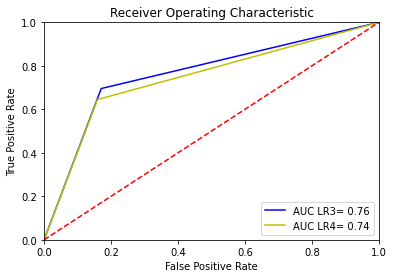

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_LR3, tpr_LR3, 'b', label = 'AUC LR3= %0.2f' % roc_auc_LR3)
plt.plot(fpr_LR4, tpr_LR4, 'y', label = 'AUC LR4= %0.2f' % roc_auc_LR4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Benchmark

In [ ]:
dataB = pd.read_csv(r"marketing_campaign Data.csv")

In [ ]:
print(dataB.shape)
benchmark=dataB.copy()
benchmark_p = benchmark.dropna(axis=0)
print(benchmark_p.shape)
print(benchmark_p.columns)

(2240, 30)
(2216, 30)
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'tot_Acc'],
      dtype='object')


In [ ]:
#TRAIN TEST SPLIT For benchmark
xB_train, xB_test, yB_train, yB_test = train_test_split(benchmark_p.drop('tot_Acc', axis=1), benchmark_p['tot_Acc'], test_size=0.3, random_state=42)

### LOGISTIC REGRESSION ON BENCHMARK - RAW DATA

In [ ]:
logB = LogisticRegression(solver='lbfgs', max_iter=1000)
logB.fit(xB_train,yB_train)
pred_lgB = logB.predict(xB_test)
print(confusion_matrix(yB_test, pred_lgB))
print(classification_report(yB_test, logB.predict(xB_test)))

[[487  34]
 [ 84  60]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       521
           1       0.64      0.42      0.50       144

    accuracy                           0.82       665
   macro avg       0.75      0.68      0.70       665
weighted avg       0.81      0.82      0.81       665



/Users/huangzexi830/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#ROC FOR LOGISTIC REGRESSION WITH BENCHMARK DATA
probs_LRB = logB.predict_proba(xB_test)
preds_LRB = probs_LRB[:,1]
fpr_LRB, tpr_LRB, threshold_LRB = roc_curve(yB_test, logB.predict(xB_test))
roc_auc_LRB = auc(fpr_LRB, tpr_LRB)

### RUN LOGISTIC REGRESSION AFTER REMOVING HIGHLY CORRELATED ATTRIBUTES
Remove the highly correlated columns


In [ ]:
benchmark_new=benchmark_p.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response'], axis=1)
xB_train1, xB_test1, yB_train1, yB_test1 = train_test_split(benchmark_new.drop('tot_Acc', axis=1), benchmark_new['tot_Acc'], test_size=0.3, random_state=42)

logB1 = LogisticRegression(solver='lbfgs', max_iter=10000)
logB1.fit(xB_train1,yB_train1)
pred_lgB1 = logB1.predict(xB_test1)
print(confusion_matrix(yB_test1, pred_lgB1))
print(classification_report(yB_test1, logB1.predict(xB_test1)))
cross_val_score_logB1 = sklearn.model_selection.cross_val_score(logB1, xB_train1, yB_train1, cv=10)
print(cross_val_score_logB1)
print(cross_val_score_logB1.mean())
logit = sms.Logit(yB_train1, xB_train1)
result = logit.fit()
print(result.summary())

[[487  34]
 [ 82  62]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       521
           1       0.65      0.43      0.52       144

    accuracy                           0.83       665
   macro avg       0.75      0.68      0.71       665
weighted avg       0.81      0.83      0.81       665

[0.79487179 0.87096774 0.80645161 0.86451613 0.83225806 0.83870968
 0.81290323 0.82580645 0.8        0.8       ]
0.8246484698097601
Optimization terminated successfully.
         Current function value: 0.387659
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                tot_Acc   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1529
Method:                           MLE   Df Model:                           21
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.2318
Time:               

In [ ]:
#ROC FOR LOGISTIC REGRESSION WITH BENCHMARK DATA, REMOVING HIGHLY CORRELATED FEATURES
probs_LRB1 = logB1.predict_proba(xB_test1)
preds_LRB1 = probs_LRB1[:,1]
fpr_LRB1, tpr_LRB1, threshold_LRB1 = roc_curve(yB_test1, logB1.predict(xB_test1))
roc_auc_LRB1 = auc(fpr_LRB1, tpr_LRB1)

### REMOVING ALL FEATURES THAT ARE STATISTICALLY INSIGINIFICANT AT ALPHA = 0.05 
#RUN LOGISTIC REGRESSION ON THIS NEW DATA

In [ ]:
dropCol = ["ID",	"Year_Birth",	"Education",	"Marital_Status",	"Income",	"Kidhome",		"Dt_Customer",	"Recency",	"MntFruits",	"MntMeatProducts",	"MntFishProducts",	"MntSweetProducts",	"MntGoldProds",	"NumWebPurchases",		"NumWebVisitsMonth",	"Complain",	"Z_CostContact",	"Z_Revenue"]
xB = pd.DataFrame(xB_train.drop(columns = dropCol))
xBTEST = pd.DataFrame(xB_test.drop(columns = dropCol))
logB2 = LogisticRegression(solver='lbfgs', max_iter=10000)
logB2.fit(xB,yB_train)
pred_lgB2 = logB2.predict(xBTEST)
print(confusion_matrix(yB_test, pred_lgB))
print(classification_report(yB_test, logB2.predict(xBTEST)))
cross_val_score_logB2 = sklearn.model_selection.cross_val_score(logB2, xB, yB_train, cv=10)
print(cross_val_score_logB2)
print(cross_val_score_logB2.mean())


[[487  34]
 [ 84  60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       521
           1       1.00      0.99      1.00       144

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [ ]:
#ROC FOR LOGISTIC REGRESSION WITH BENCHMARK DATA, REMOVING STATISTICALLY INSIGINIFICANT FEATURES AT ALPHA = 0.05 
probs_LRB2 = logB2.predict_proba(xBTEST)
preds_LRB2 = probs_LRB2[:,1]
fpr_LRB2, tpr_LRB2, threshold_LRB2 = roc_curve(yB_test, logB2.predict(xBTEST))
roc_auc_LRB2 = auc(fpr_LRB2, tpr_LRB2)

### Receiver Operating Characteristic

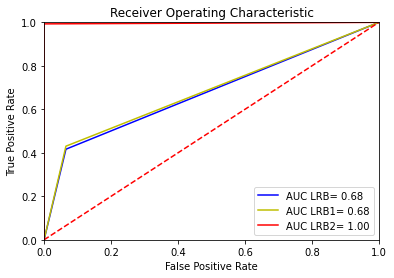

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_LRB, tpr_LRB, 'b', label = 'AUC LRB= %0.2f' % roc_auc_LRB)
plt.plot(fpr_LRB1, tpr_LRB1, 'y', label = 'AUC LRB1= %0.2f' % roc_auc_LRB1)
plt.plot(fpr_LRB2, tpr_LRB2, 'r', label = 'AUC LRB2= %0.2f' % roc_auc_LRB2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()